In [1]:
!pip install -q seaborn

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

In [3]:
# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

print(tf.__version__)
# To make the results reproducible, set the random seed value.
tf.random.set_seed(22)

2.9.2


In [4]:
%cd drive/MyDrive

/content/drive/MyDrive


In [8]:
dataset = pd.read_csv('kaggleOBD_10252022.csv')
dataset1 = pd.read_csv('log1_10262022.csv')
dataset2 = pd.read_csv('log2_10262022Edit.csv')

In [6]:
dataset.head()

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine Coolant Temperature(°C),Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Mass Air Flow Rate(g/s),Throttle Position(Manifold)(%)
0,Thu Nov 02 15:44:24 CDT 2017,44:25.1,-97.662474,30.483089,2.795157,93,250,211.6,0.350434,9.163701,-2.947818,0.000910,56,2623.25,30,92.549019,33.759998,32.549019
1,Thu Nov 02 15:44:25 CDT 2017,44:26.1,-97.662476,30.483068,0.000000,98,255,0.0,-6.745979,4.394452,-4.039574,-0.062790,56,3169.50,30,90.980392,37.200001,32.549019
2,Thu Nov 02 15:44:26 CDT 2017,44:27.1,-97.662478,30.483006,0.000000,105,247,0.0,-0.923281,7.736757,3.870868,-0.094130,56,2587.50,30,98.431374,35.180000,37.647060
3,Thu Nov 02 15:44:27 CDT 2017,44:28.1,-97.662546,30.482689,0.000000,101,225,0.0,-4.792311,2.172633,16.387754,0.773513,57,2753.00,30,98.039215,38.040001,39.215687
4,Thu Nov 02 15:44:27 CDT 2017,44:29.1,-97.662546,30.482689,0.000000,101,225,0.0,-0.061368,7.190879,6.686450,0.038575,57,2957.00,30,96.862747,39.349998,38.823528


In [7]:
dataset1.head()

,HP Tuners CSV Log File,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Version: 1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[Log Information],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Creation Time: 10/26/2022 8:44:02 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset2.head()

,Offset,Engine RPM (SAE),Long Term Fuel Trim Bank 2 (SAE),Short Term Fuel Trim Bank 2 (SAE),Short Term Fuel Trim Bank 1 (SAE),Timing Advance (SAE),Long Term Fuel Trim Bank 1 (SAE),Fuel System #1 Status (SAE),Throttle Position (SAE),O2 Voltage B1S1 (SAE),O2 Voltage B2S1 (SAE),Calculated Engine Load (SAE),Vehicle Speed (SAE),Number of Emission Related DTC (SAE),Intake Air Temp (SAE),Engine Coolant Temp (SAE),Distance With MIL (SAE),OBD Requirements (SAE)
0,6.323,1239.250000,-1.562500,2.343750,0.781250,10.0,-0.781250,CL - Normal,25.098039,0.052559,0.047617,57.254902,9.320568,0,109.4,192.2,0,OBD2
1,6.818,1395.784137,-0.750688,4.146731,2.231331,10.0,-0.599564,CL - Normal,25.098039,0.052559,0.047617,57.254902,9.320568,0,109.4,192.2,0,OBD2
2,7.322,1626.000000,0.781250,8.593750,7.031250,10.0,0.031952,CL - Normal,26.043719,0.293958,0.138945,58.501089,9.530969,0,109.4,192.2,0,OBD2
3,7.848,1664.505000,0.781250,7.955729,6.617343,10.0,0.781250,CL - Normal,27.450980,0.757715,0.367773,62.745098,10.048123,0,109.4,192.2,0,OBD2
4,8.372,1740.750000,0.781250,4.687500,2.343750,10.0,0.781250,CL - Normal,27.450980,0.611589,0.419858,62.745098,10.563310,0,109.4,192.2,0,OBD2


In [10]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Offset                                981 non-null    float64
 1   Engine RPM (SAE)                      981 non-null    float64
 2   Long Term Fuel Trim Bank 2 (SAE)      981 non-null    float64
 3   Short Term Fuel Trim Bank 2 (SAE)     981 non-null    float64
 4   Short Term Fuel Trim Bank 1 (SAE)     981 non-null    float64
 5   Timing Advance (SAE)                  981 non-null    float64
 6   Long Term Fuel Trim Bank 1 (SAE)      981 non-null    float64
 7   Fuel System #1 Status (SAE)           981 non-null    object 
 8   Throttle Position (SAE)               981 non-null    float64
 9   O2 Voltage B1S1 (SAE)                 981 non-null    float64
 10  O2 Voltage B2S1 (SAE)                 981 non-null    float64
 11  Calculated Engine L

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GPS Time                           1356 non-null   object 
 1    Device Time                       1356 non-null   object 
 2    Longitude                         1356 non-null   float64
 3    Latitude                          1356 non-null   float64
 4   GPS Speed (Meters/second)          1356 non-null   float64
 5    Horizontal Dilution of Precision  1356 non-null   int64  
 6    Altitude                          1356 non-null   int64  
 7    Bearing                           1356 non-null   float64
 8    G(x)                              1356 non-null   float64
 9    G(y)                              1356 non-null   float64
 10   G(z)                              1356 non-null   float64
 11   G(calibrated)                     1356 non-null   float

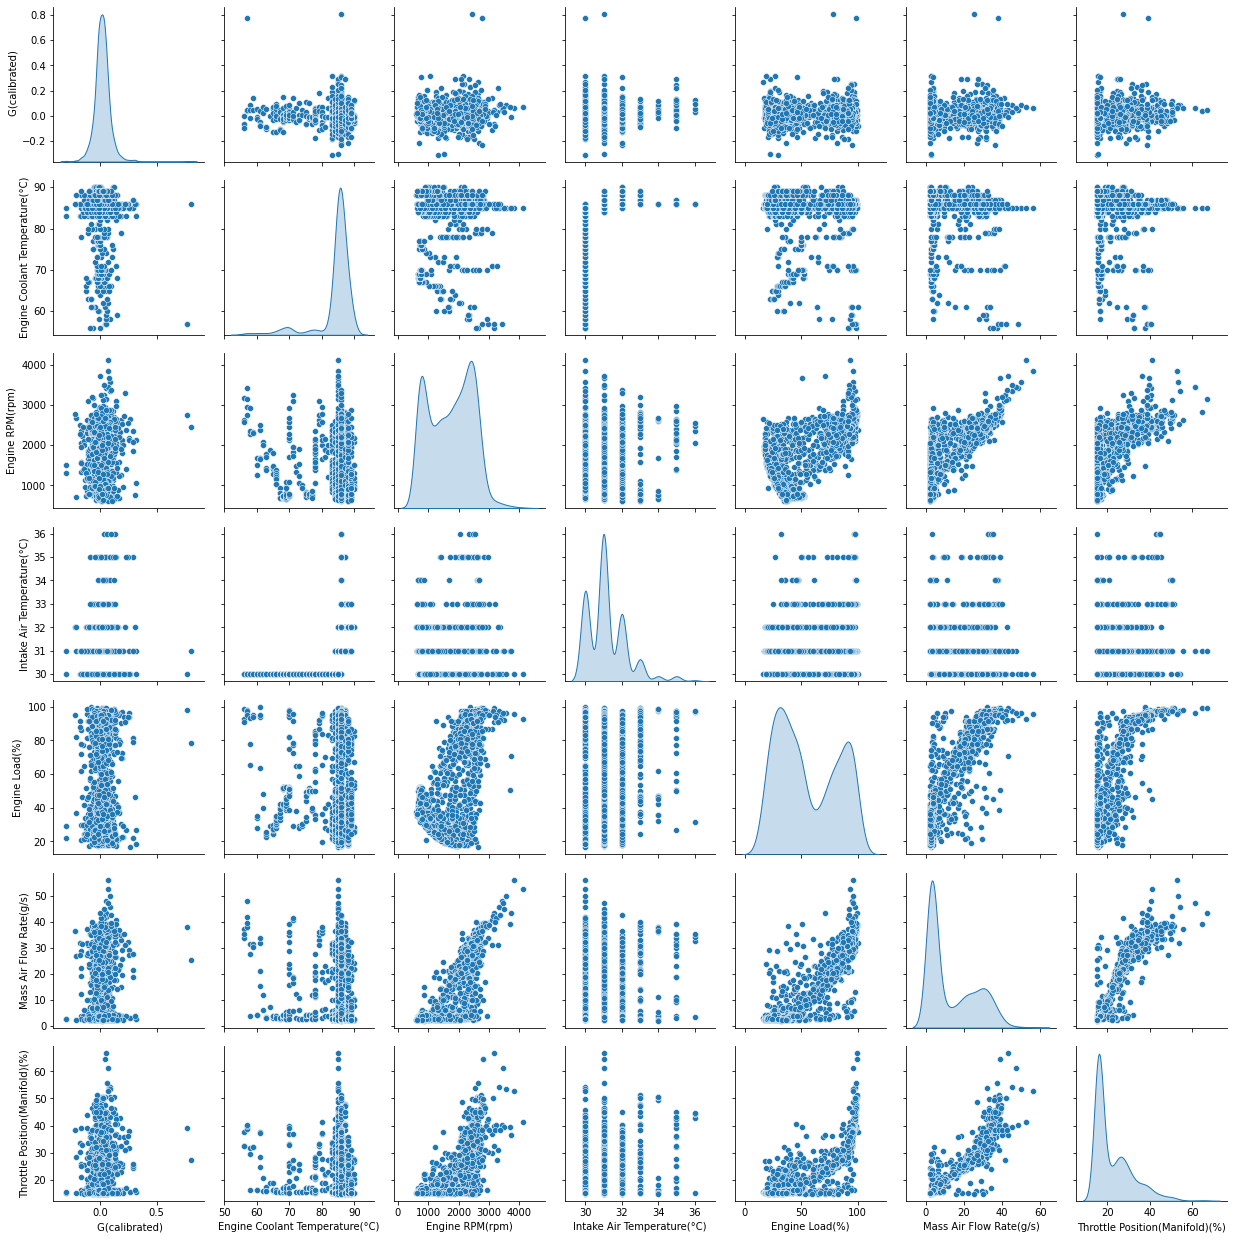

In [ ]:
sns.pairplot(dataset.iloc[:, 11:], diag_kind='kde');

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Longitude,1356.0,-97.716240,0.040513,-97.777058,-97.762114,-97.693833,-97.685137,-97.662474
Latitude,1356.0,30.536503,0.030855,30.482689,30.508071,30.550567,30.557920,30.574231
GPS Speed (Meters/second),1356.0,13.644352,10.319835,0.000000,2.557545,13.560015,22.986395,32.540222
Horizontal Dilution of Precision,1356.0,52.460914,47.350128,11.000000,18.000000,29.000000,91.000000,246.000000
Altitude,1356.0,236.735988,47.046773,60.000000,217.000000,229.000000,252.000000,454.000000
Bearing,1356.0,211.945133,140.549289,0.000000,38.150000,258.550000,336.125000,359.900000
G(x),1356.0,0.572515,1.528175,-7.692474,-0.235302,0.600083,1.576419,4.602767
G(y),1356.0,6.510720,2.076501,-2.073723,5.532770,6.680282,7.715458,11.798932
G(z),1356.0,6.482762,2.229453,-4.262598,5.567860,6.784478,7.848844,19.633602
G(calibrated),1356.0,0.016298,0.071754,-0.305164,-0.019881,0.014268,0.049367,0.806779


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
data_drop = pd.read_csv('OBD.csv', usecols=[4,6,7,12,13,14,15,16,17])
data_drop

,GPS Speed (Meters/second),Altitude,Bearing,Engine Coolant Temperature(°C),Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Mass Air Flow Rate(g/s),Throttle Position(Manifold)(%)
0,2.795157,250,211.6,56,2623.25,30,92.549019,33.759998,32.549019
1,0.000000,255,0.0,56,3169.50,30,90.980392,37.200001,32.549019
2,0.000000,247,0.0,56,2587.50,30,98.431374,35.180000,37.647060
3,0.000000,225,0.0,57,2753.00,30,98.039215,38.040001,39.215687
4,0.000000,225,0.0,57,2957.00,30,96.862747,39.349998,38.823528
...,...,...,...,...,...,...,...,...,...
1351,2.946795,272,271.7,89,718.75,32,47.843140,3.920000,16.470589
1352,2.936818,272,271.7,89,798.25,32,46.666668,3.750000,16.470589
1353,2.926175,272,271.6,89,799.00,32,37.647060,2.260000,15.294118
1354,2.926175,272,271.6,89,784.25,32,33.333332,2.320000,15.294118


In [ ]:
clusterer = KMeans(n_clusters= 2, random_state=10)
cluster_labels = clusterer.fit_predict(data_drop)

In [ ]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
data_drop['labels'] = cluster_labels

In [ ]:
data_drop

,GPS Speed (Meters/second),Altitude,Bearing,Engine Coolant Temperature(°C),Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Mass Air Flow Rate(g/s),Throttle Position(Manifold)(%),labels
0,2.795157,250,211.6,56,2623.25,30,92.549019,33.759998,32.549019,1
1,0.000000,255,0.0,56,3169.50,30,90.980392,37.200001,32.549019,1
2,0.000000,247,0.0,56,2587.50,30,98.431374,35.180000,37.647060,1
3,0.000000,225,0.0,57,2753.00,30,98.039215,38.040001,39.215687,1
4,0.000000,225,0.0,57,2957.00,30,96.862747,39.349998,38.823528,1
...,...,...,...,...,...,...,...,...,...,...
1351,2.946795,272,271.7,89,718.75,32,47.843140,3.920000,16.470589,0
1352,2.936818,272,271.7,89,798.25,32,46.666668,3.750000,16.470589,0
1353,2.926175,272,271.6,89,799.00,32,37.647060,2.260000,15.294118,0
1354,2.926175,272,271.6,89,784.25,32,33.333332,2.320000,15.294118,0


Data is basically clustered by engine RPM. I do not know what this means, but this is likely due to RPM being the attribute that correlates the most with the otehr relevant attributes being plotted
More data to come

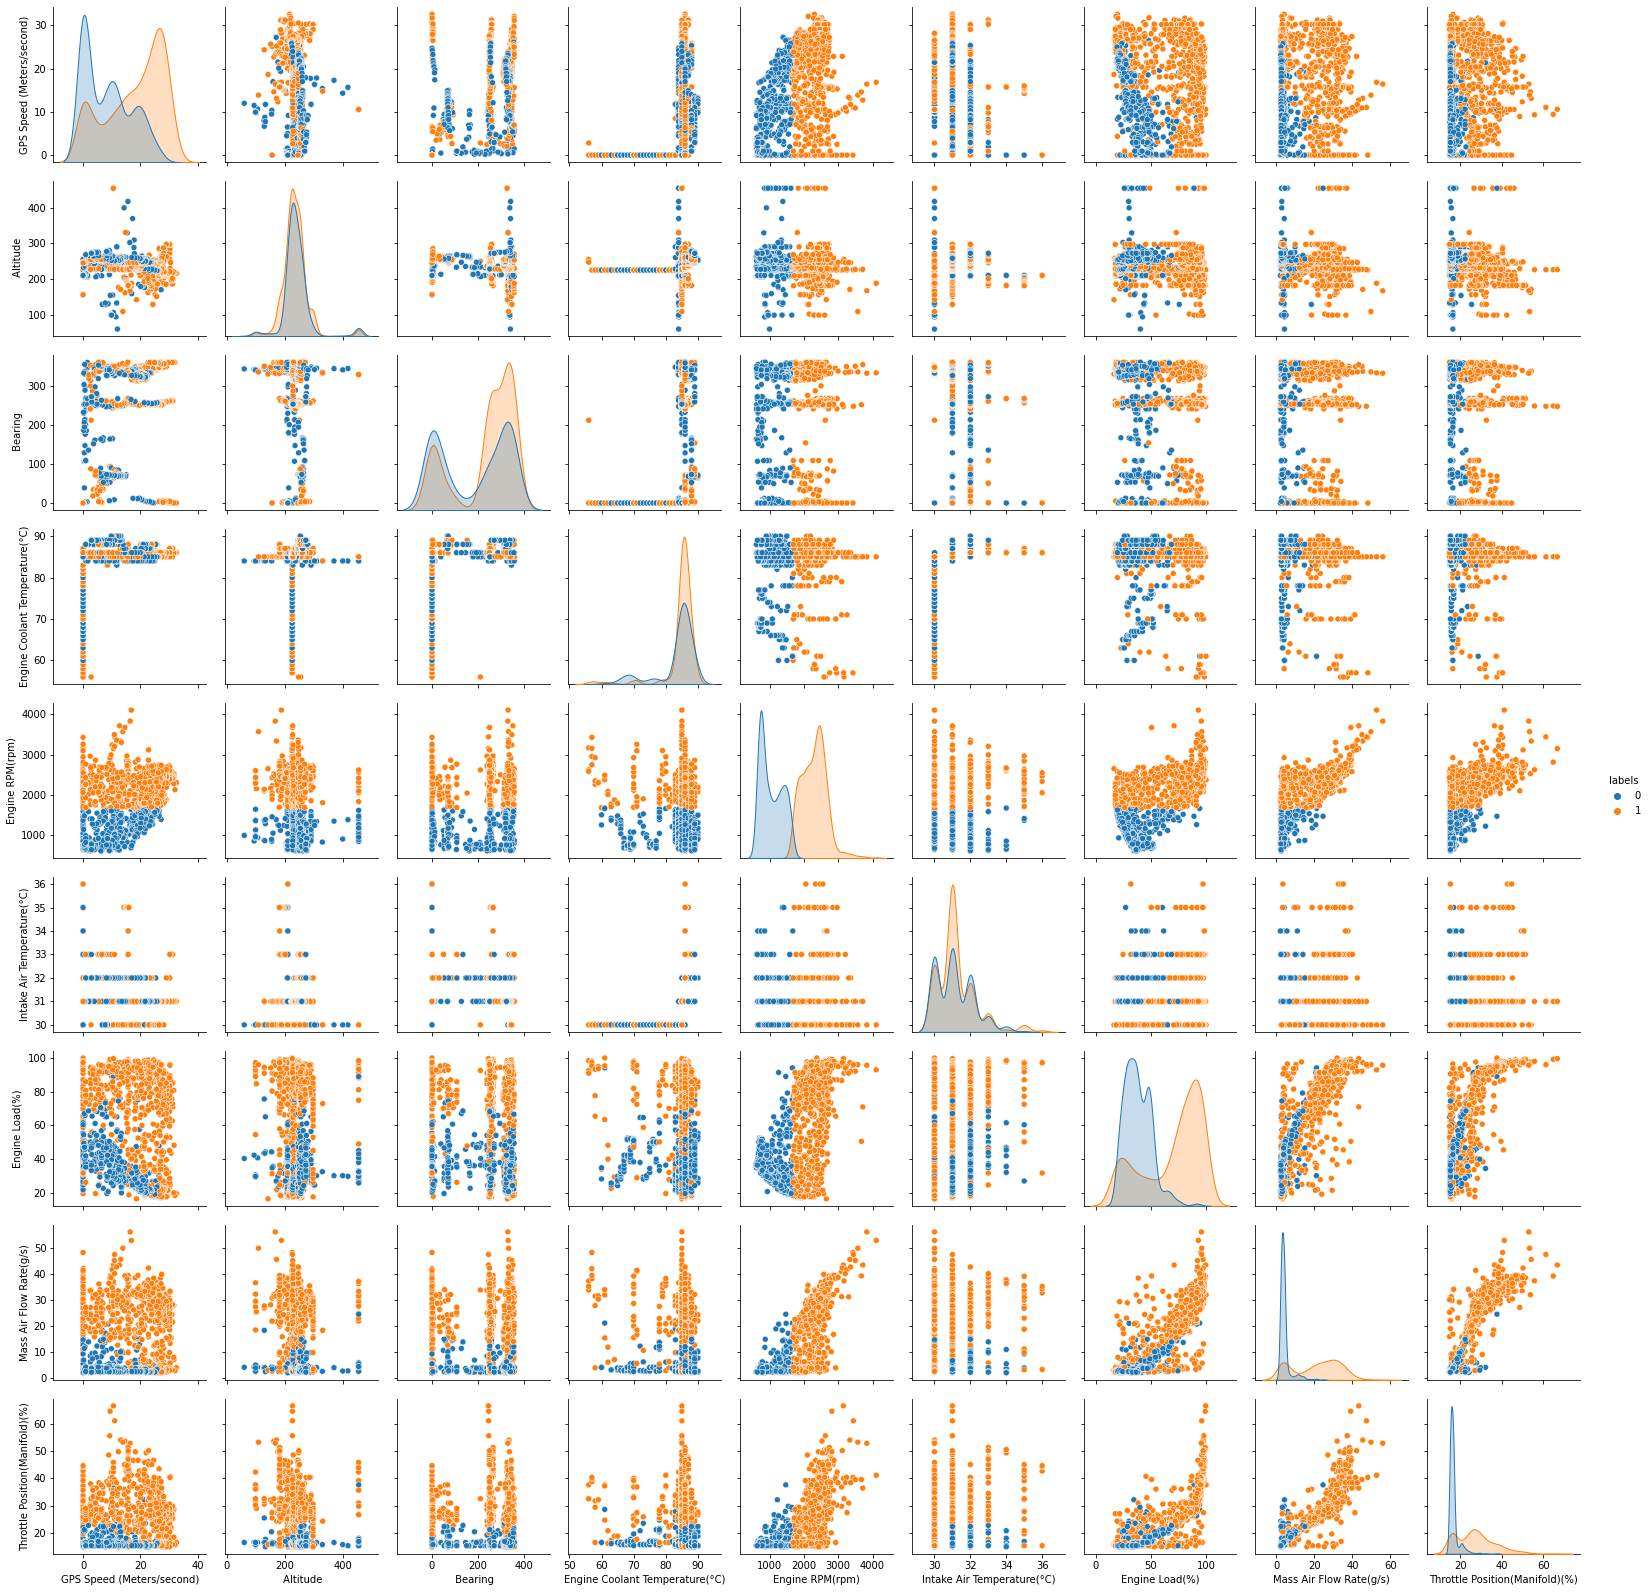

In [ ]:
sns.pairplot(data_drop, hue= 'labels', diag_kind='kde');

In [ ]:
data_drop.corr()

,GPS Speed (Meters/second),Altitude,Bearing,Engine Coolant Temperature(°C),Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Mass Air Flow Rate(g/s),Throttle Position(Manifold)(%),labels
GPS Speed (Meters/second),1.000000,0.032610,0.583507,0.417401,0.499056,-0.047190,0.034149,0.180475,0.135972,0.455726
Altitude,0.032610,1.000000,0.094324,0.092642,-0.057140,-0.097802,-0.040361,-0.040260,-0.048992,-0.060181
Bearing,0.583507,0.094324,1.000000,0.455516,0.228598,-0.057037,0.017296,0.097442,0.110505,0.192224
Engine Coolant Temperature(°C),0.417401,0.092642,0.455516,1.000000,0.095837,0.472764,-0.008491,0.020391,0.023335,0.105901
Engine RPM(rpm),0.499056,-0.057140,0.228598,0.095837,1.000000,0.017625,0.633114,0.782658,0.706119,0.874846
Intake Air Temperature(°C),-0.047190,-0.097802,-0.057037,0.472764,0.017625,1.000000,0.112824,0.080610,0.098047,0.033733
Engine Load(%),0.034149,-0.040361,0.017296,-0.008491,0.633114,0.112824,1.000000,0.868531,0.821979,0.590375
Mass Air Flow Rate(g/s),0.180475,-0.040260,0.097442,0.020391,0.782658,0.080610,0.868531,1.000000,0.923232,0.669301
Throttle Position(Manifold)(%),0.135972,-0.048992,0.110505,0.023335,0.706119,0.098047,0.821979,0.923232,1.000000,0.589899
labels,0.455726,-0.060181,0.192224,0.105901,0.874846,0.033733,0.590375,0.669301,0.589899,1.000000


In [ ]:
import os 
data_drop.to_csv('data_out.csv') 